In [1]:
import numpy as np
from SALib.sample import fast_sampler
from SALib.analyze import sobol
from SALib.analyze import fast
import matplotlib.pyplot as plt
from SALib import ProblemSpec
from SALib.sample import saltelli

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Pacejka52 as pa52
import Pacejka52_Sv_Sh_0 as pa52_0
import Pacejka52_params_comp as pa52pa

C:\Users\bener\AppData\Local\Temp\ipykernel_29432\1163840592.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
C:\Users\bener\AppData\Local\Temp\ipykernel_29432\1163840592.py:159: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)


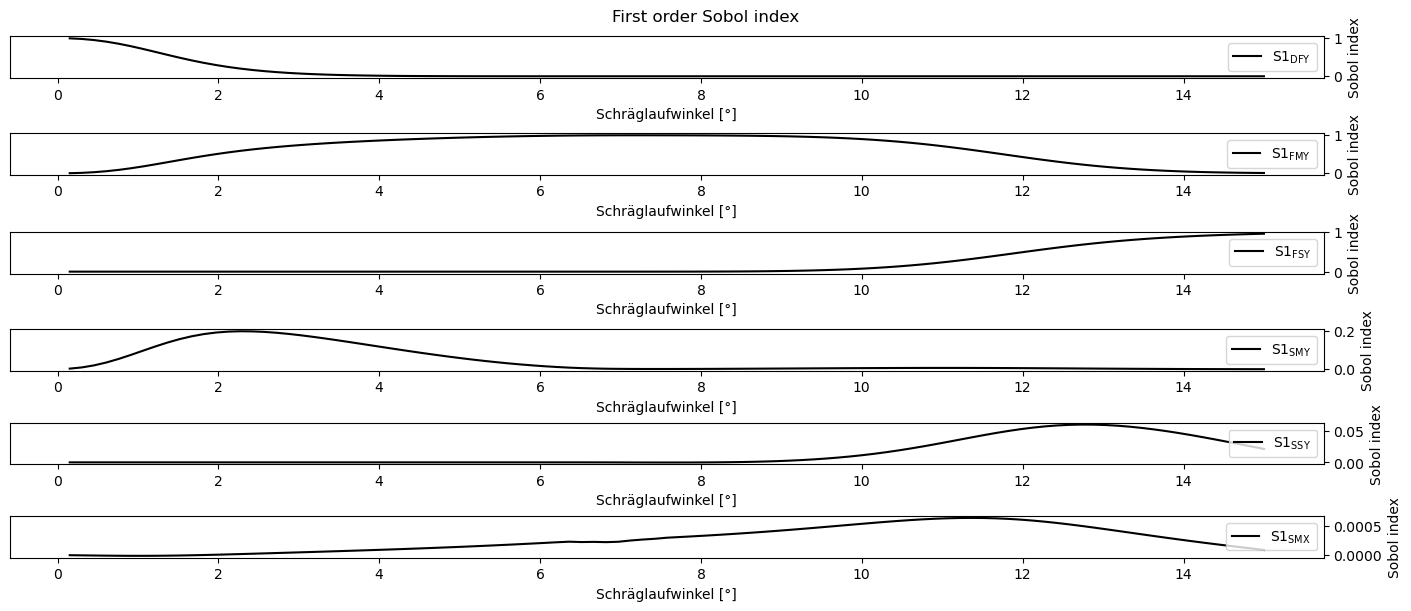

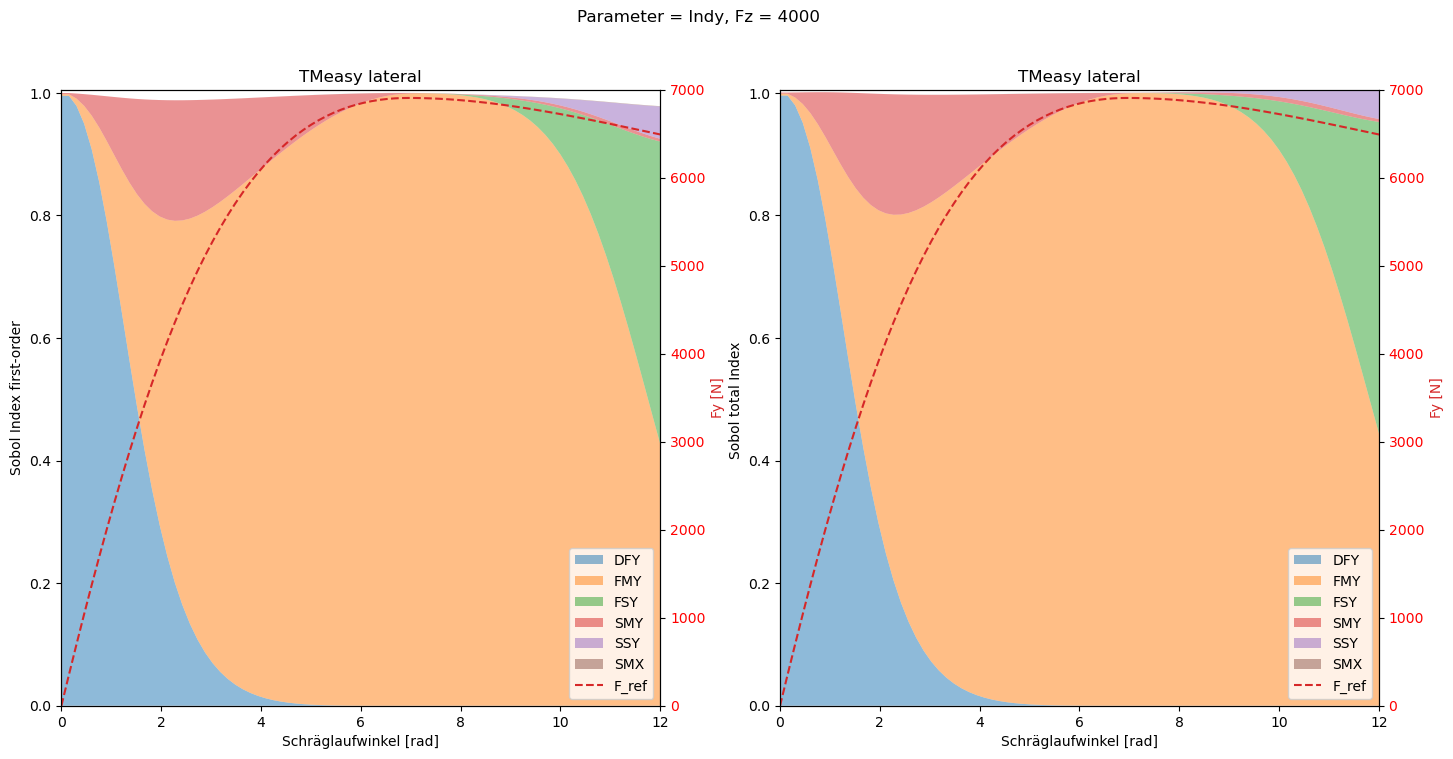

In [6]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm
#function
SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
SY_plt = np.linspace(0,15,100)
Fy_params_alt = [1.17442284e+05 ,6.96692988e+03 ,6.19030406e+03, 1.40228962e-01,3.33896904e-01 ,3.52710315e+00]
F_ref = tm.calcFY(SX, SY,*Fy_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 6,
    'names': ['DFY', 'FMY', 'FSY', 'SMY', 'SSY','SMX'],
    'bounds': [[1.17442284e+05 *(1-s),1.17442284e+05*(1+s)], [6.96692988e+03*(1-s), 6.96692988e+03*(1+s)], 
               [6.19030406e+03*(1-s), 6.19030406e+03*(1+s)], [1.40228962e-01*(1-s), 1.40228962e-01*(1+s)],
               [3.33896904e-01*(1-s), 3.33896904e-01*(1+s)], [3.52710315e+00*(1-s), 3.52710315e+00*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (DFY, FMY, FSY, SMY, SSY,SMX) in enumerate(ab):
        y[i,:] = tm.calcFY(SX, SY, DFY, FMY, FSY, SMY, SSY,SMX)

    return y

itera = 8
(
sp.sample_sobol(2**itera) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
gs = fig.add_gridspec(6 ,1)
fig.suptitle('First order Sobol index')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.plot(SY_plt, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("Schräglaufwinkel [°]")
    ax.set_ylabel("Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
#DFY, FMY, FSY, SMY, SSY,SMX
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
fig.suptitle('Parameter = Indy, Fz = 4000')

S1s_DFY  = np.array(S1s[:,0])
S1s_DFY[0] = S1s_DFY[1]
S1s_FMY  = np.array(S1s[:,1])
S1s_FMY[0] = S1s_FMY[1]
S1s_FSY  = np.array(S1s[:,2])
S1s_FSY[0] = S1s_FSY[1]
S1s_SMY  = np.array(S1s[:,3])
S1s_SMY[0] = S1s_SMY[1]
S1s_SSY  = np.array(S1s[:,4])
S1s_SSY[0] = S1s_SSY[1]
S1s_SMX  = np.array(S1s[:,5])
S1s_SMX[0] = S1s_SMX[1]

S1s_FMY_plt = np.array([x+y for x,y in zip(S1s_DFY,S1s_FMY)])
S1s_FSY_plt = np.array([x+y for x,y in zip(S1s_FMY_plt,S1s_FSY)])
S1s_SMY_plt = np.array([x+y for x,y in zip(S1s_FSY_plt,S1s_SMY)])
S1s_SSY_plt = np.array([x+y for x,y in zip(S1s_SMY_plt,S1s_SSY)])
S1s_SMX_plt = np.array([x+y for x,y in zip(S1s_SSY_plt,S1s_SMX)])


ax1.fill_between(SY_plt,S1s_DFY,0, alpha=0.5, label = 'DFY') #alpha = deckkraft farbe
ax1.fill_between(SY_plt,S1s_DFY,S1s_FMY_plt, where = (S1s_FMY_plt > S1s_DFY), alpha=0.5, label = 'FMY')
ax1.fill_between(SY_plt,S1s_FMY_plt,S1s_FSY_plt, where = (S1s_FSY_plt > S1s_FMY_plt), alpha=0.5, label = 'FSY')
ax1.fill_between(SY_plt,S1s_FSY_plt,S1s_SMY_plt, where = (S1s_SMY_plt > S1s_FSY_plt), alpha=0.5, label = 'SMY')
ax1.fill_between(SY_plt,S1s_SMY_plt,S1s_SSY_plt, where = (S1s_SSY_plt > S1s_SMY_plt), alpha=0.5, label = 'SSY')
ax1.fill_between(SY_plt,S1s_SSY_plt,S1s_SMX_plt, where = (S1s_SMX_plt > S1s_SSY_plt), alpha=0.5, label = 'SMX')
ax1.set_xlabel('Schräglaufwinkel [rad]')
ax1.set_ylabel('Sobol Index first-order')
ax1.set_title('TMeasy lateral')
ax1.set_xlim(0,12)
ax1.set_ylim(0,1.005)

color = 'tab:red'
ax3 = ax1.twinx()
ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax3.set_ylim(0,7000)
ax3.set_ylabel('Fy [N]', color = color)
ax3.tick_params(axis='y', labelcolor='red')

ln1, lab1 = ax1.get_legend_handles_labels()
ln3, lab3 = ax3.get_legend_handles_labels()
lns = ln1 + ln3
labs = lab1 + lab3
ax1.legend(lns, labs, loc='lower right')

STs_DFY  = np.array(STs[:,0])
STs_DFY[0] = STs_DFY[1]
STs_FMY  = np.array(STs[:,1])
STs_FMY[0] = STs_FMY[1]
STs_FSY  = np.array(STs[:,2])
STs_FSY[0] = STs_FSY[1]
STs_SMY  = np.array(STs[:,3])
STs_SMY[0] = STs_SMY[1]
STs_SSY  = np.array(STs[:,4])
STs_SSY[0] = STs_SSY[1]
STs_SMX  = np.array(STs[:,5])
STs_SMX[0] = STs_SMX[1]

STs_FMY_plt = np.array([x+y for x,y in zip(STs_DFY,STs_FMY)])
STs_FSY_plt = np.array([x+y for x,y in zip(STs_FMY_plt,STs_FSY)])
STs_SMY_plt = np.array([x+y for x,y in zip(STs_FSY_plt,STs_SMY)])
STs_SSY_plt = np.array([x+y for x,y in zip(STs_SMY_plt,STs_SSY)])
STs_SMX_plt = np.array([x+y for x,y in zip(STs_SSY_plt,STs_SMX)])

ax2.fill_between(SY_plt,STs_DFY,0, alpha=0.5, label = 'DFY') #alpha = deckkraft farbe
ax2.fill_between(SY_plt,STs_DFY,STs_FMY_plt, where = (STs_FMY_plt > STs_DFY), alpha=0.5, label = 'FMY')
ax2.fill_between(SY_plt,STs_FMY_plt,STs_FSY_plt, where = (STs_FSY_plt > STs_FMY_plt), alpha=0.5, label = 'FSY')
ax2.fill_between(SY_plt,STs_FSY_plt,STs_SMY_plt, where = (STs_SMY_plt > STs_FSY_plt), alpha=0.5, label = 'SMY')
ax2.fill_between(SY_plt,STs_SMY_plt,STs_SSY_plt, where = (STs_SSY_plt > STs_SMY_plt), alpha=0.5, label = 'SSY')
ax2.fill_between(SY_plt,STs_SSY_plt,STs_SMX_plt, where = (STs_SMX_plt > STs_SSY_plt), alpha=0.5, label = 'SMX')
ax2.set_xlabel('Schräglaufwinkel [rad]')
ax2.set_ylabel('Sobol total Index ')
ax2.set_title('TMeasy lateral')
ax2.set_xlim(0,12)
ax2.set_ylim(0,1.005)

ax4 = ax2.twinx()
ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax4.set_ylim(0,7000)
ax4.set_ylabel('Fy [N]', color = color)
ax4.tick_params(axis='y', labelcolor='red')

ln2, lab2 = ax1.get_legend_handles_labels()
ln4, lab4 = ax3.get_legend_handles_labels()
lns = ln2 + ln4
labs = lab2 + lab4
ax2.legend(lns, labs, loc='lower right')


C:\Users\bener\AppData\Local\Temp\ipykernel_29432\2101317140.py:117: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(SX,F_ref, 'r--', label='F_ref',color = color)
C:\Users\bener\AppData\Local\Temp\ipykernel_29432\2101317140.py:160: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax4.plot(SX,F_ref, 'r--', label='F_ref',color = color)


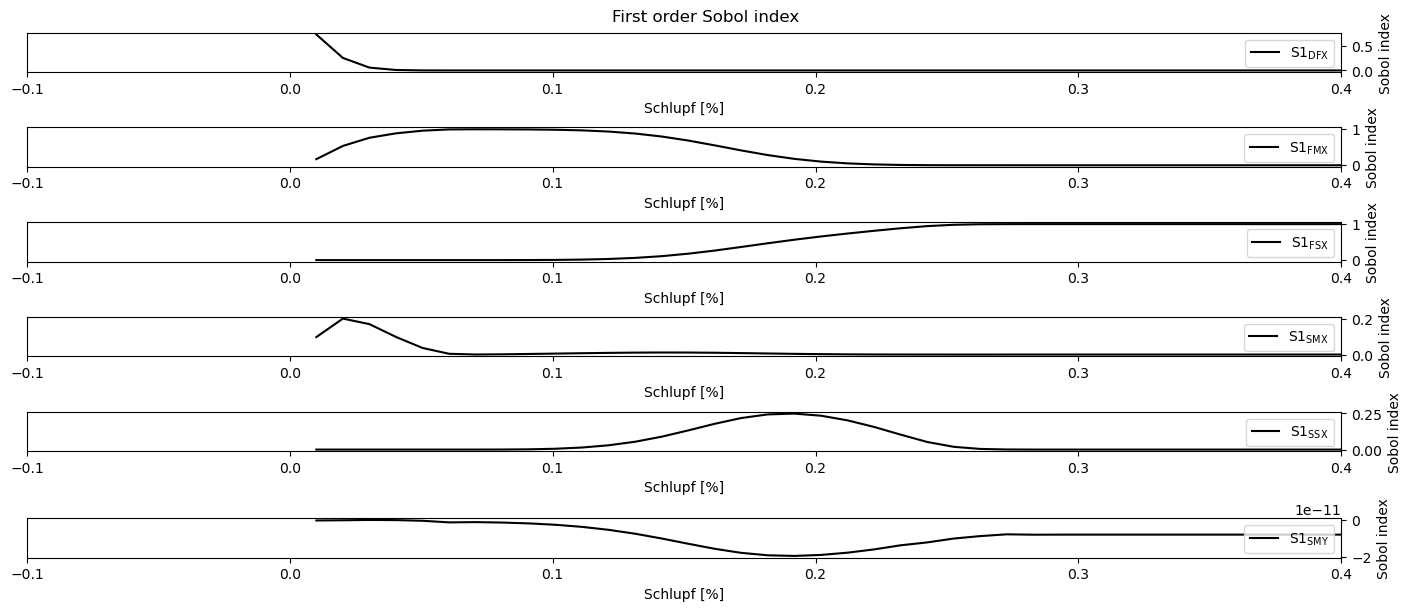

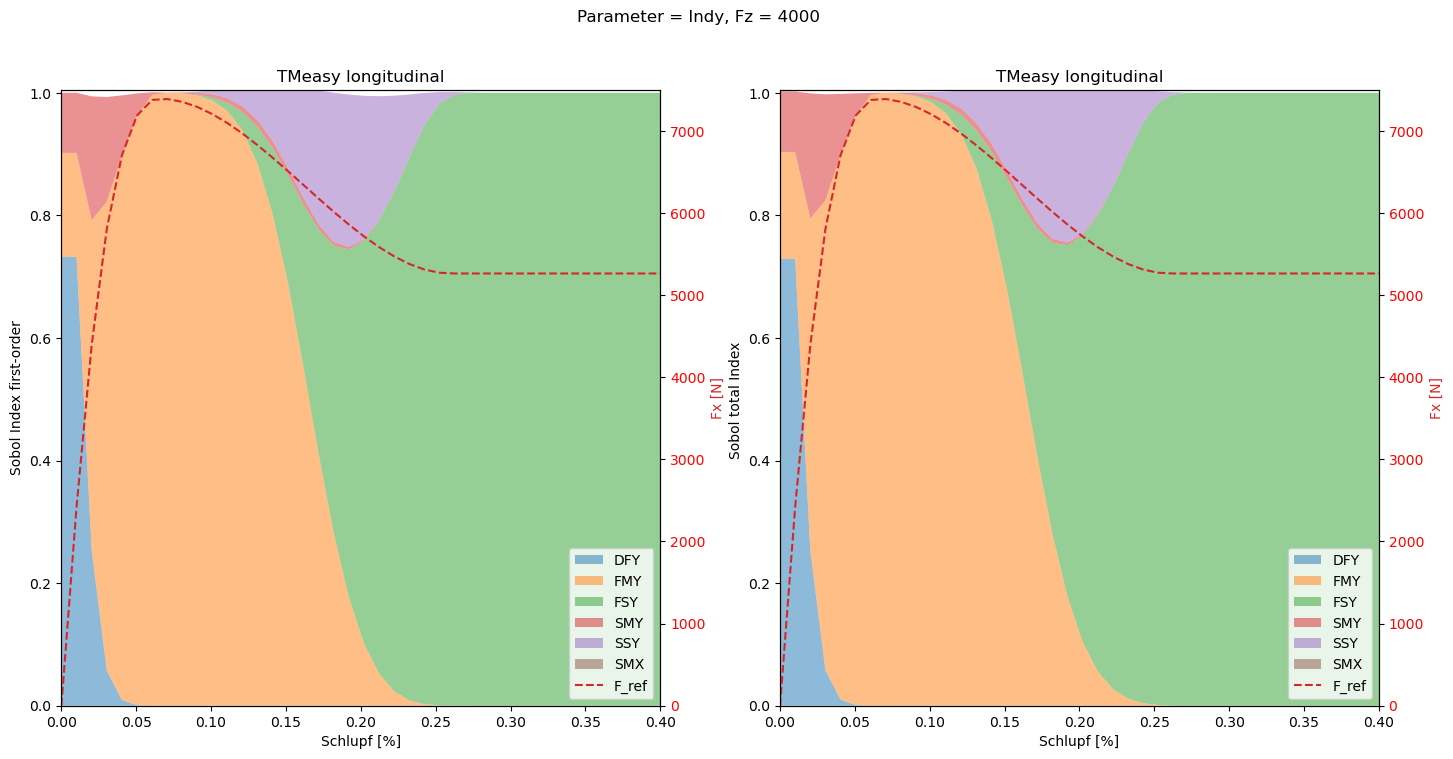

In [10]:
#same SA for Pacejka5 long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm
#function
SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fx_params_alt = [2.53974515e+05, 7.39199255e+03, 5.26261106e+03, 6.49997821e-02,
 2.59983609e-01, 1.13984715e+03]
F_ref = tm.calcFx(SX, SY,*Fx_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 6,
    'names': ['DFX', 'FMX', 'FSX', 'SMX','SSX', 'SMY'],
    'bounds': [[2.53974515e+05 *(1-s),2.53974515e+05*(1+s)], [7.39199255e+03*(1-s), 7.39199255e+03*(1+s)], 
               [5.26261106e+03*(1-s), 5.26261106e+03*(1+s)], [6.49997821e-02*(1-s), 6.49997821e-02*(1+s)],
               [2.59983609e-01*(1-s), 2.59983609e-01*(1+s)], [1.13984715e+03*(1-s), 1.13984715e+03*(1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SX=SX):
    y = np.zeros((ab.shape[0], SX.shape[0]))
    for i, (DFY, FMY, FSY, SMY, SSY,SMX) in enumerate(ab):
        y[i,:] = tm.calcFx(SX, SY, DFY, FMY, FSY, SMY, SSY,SMX)

    return y

itera = 8
(
sp.sample_sobol(2**itera) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(14, 6), constrained_layout=True)
gs = fig.add_gridspec(6 ,1)
fig.suptitle('First order Sobol index')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.plot(SX, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("Schlupf [%]")
    ax.set_ylabel("Sobol index")
    #ax.set_xlim(-0.0001, 0.4)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
#DFY, FMY, FSY, SMY, SSY,SMX
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
fig.suptitle('Parameter = Indy, Fz = 4000')

S1s_DFY  = np.array(S1s[:,0])
S1s_DFY[0] = S1s_DFY[1]
S1s_FMY  = np.array(S1s[:,1])
S1s_FMY[0] = S1s_FMY[1]
S1s_FSY  = np.array(S1s[:,2])
S1s_FSY[0] = S1s_FSY[1]
S1s_SMY  = np.array(S1s[:,3])
S1s_SMY[0] = S1s_SMY[1]
S1s_SSY  = np.array(S1s[:,4])
S1s_SSY[0] = S1s_SSY[1]
S1s_SMX  = np.array(S1s[:,5])
S1s_SMX[0] = S1s_SMX[1]

S1s_FMY_plt = np.array([x+y for x,y in zip(S1s_DFY,S1s_FMY)])
S1s_FSY_plt = np.array([x+y for x,y in zip(S1s_FMY_plt,S1s_FSY)])
S1s_SMY_plt = np.array([x+y for x,y in zip(S1s_FSY_plt,S1s_SMY)])
S1s_SSY_plt = np.array([x+y for x,y in zip(S1s_SMY_plt,S1s_SSY)])
S1s_SMX_plt = np.array([x+y for x,y in zip(S1s_SSY_plt,S1s_SMX)])


ax1.fill_between(SX,S1s_DFY,0, alpha=0.5, label = 'DFY') #alpha = deckkraft farbe
ax1.fill_between(SX,S1s_DFY,S1s_FMY_plt, where = (S1s_FMY_plt > S1s_DFY), alpha=0.5, label = 'FMY')
ax1.fill_between(SX,S1s_FMY_plt,S1s_FSY_plt, where = (S1s_FSY_plt > S1s_FMY_plt), alpha=0.5, label = 'FSY')
ax1.fill_between(SX,S1s_FSY_plt,S1s_SMY_plt, where = (S1s_SMY_plt > S1s_FSY_plt), alpha=0.5, label = 'SMY')
ax1.fill_between(SX,S1s_SMY_plt,S1s_SSY_plt, where = (S1s_SSY_plt > S1s_SMY_plt), alpha=0.5, label = 'SSY')
ax1.fill_between(SX,S1s_SSY_plt,S1s_SMX_plt, where = (S1s_SMX_plt > S1s_SSY_plt), alpha=0.5, label = 'SMX')
ax1.set_xlabel("Schlupf [%]")
ax1.set_ylabel('Sobol Index first-order')
ax1.set_title('TMeasy longitudinal')
ax1.set_xlim(0,0.4)
ax1.set_ylim(0,1.005)

color = 'tab:red'
ax3 = ax1.twinx()
ax3.plot(SX,F_ref, 'r--', label='F_ref',color = color)
ax3.set_ylim(0,7500)
ax3.set_ylabel('Fx [N]', color = color)
ax3.tick_params(axis='y', labelcolor='red')

ln1, lab1 = ax1.get_legend_handles_labels()
ln3, lab3 = ax3.get_legend_handles_labels()
lns = ln1 + ln3
labs = lab1 + lab3
ax1.legend(lns, labs, loc='lower right')

STs_DFY  = np.array(STs[:,0])
STs_DFY[0] = STs_DFY[1]
STs_FMY  = np.array(STs[:,1])
STs_FMY[0] = STs_FMY[1]
STs_FSY  = np.array(STs[:,2])
STs_FSY[0] = STs_FSY[1]
STs_SMY  = np.array(STs[:,3])
STs_SMY[0] = STs_SMY[1]
STs_SSY  = np.array(STs[:,4])
STs_SSY[0] = STs_SSY[1]
STs_SMX  = np.array(STs[:,5])
STs_SMX[0] = STs_SMX[1]

STs_FMY_plt = np.array([x+y for x,y in zip(STs_DFY,STs_FMY)])
STs_FSY_plt = np.array([x+y for x,y in zip(STs_FMY_plt,STs_FSY)])
STs_SMY_plt = np.array([x+y for x,y in zip(STs_FSY_plt,STs_SMY)])
STs_SSY_plt = np.array([x+y for x,y in zip(STs_SMY_plt,STs_SSY)])
STs_SMX_plt = np.array([x+y for x,y in zip(STs_SSY_plt,STs_SMX)])

ax2.fill_between(SX,STs_DFY,0, alpha=0.5, label = 'DFY') #alpha = deckkraft farbe
ax2.fill_between(SX,STs_DFY,STs_FMY_plt, where = (STs_FMY_plt > STs_DFY), alpha=0.5, label = 'FMY')
ax2.fill_between(SX,STs_FMY_plt,STs_FSY_plt, where = (STs_FSY_plt > STs_FMY_plt), alpha=0.5, label = 'FSY')
ax2.fill_between(SX,STs_FSY_plt,STs_SMY_plt, where = (STs_SMY_plt > STs_FSY_plt), alpha=0.5, label = 'SMY')
ax2.fill_between(SX,STs_SMY_plt,STs_SSY_plt, where = (STs_SSY_plt > STs_SMY_plt), alpha=0.5, label = 'SSY')
ax2.fill_between(SX,STs_SSY_plt,STs_SMX_plt, where = (STs_SMX_plt > STs_SSY_plt), alpha=0.5, label = 'SMX')
ax2.set_xlabel("Schlupf [%]")
ax2.set_ylabel('Sobol total Index ')
ax2.set_title('TMeasy longitudinal')
ax2.set_xlim(0,0.4)
ax2.set_ylim(0,1.005)

ax4 = ax2.twinx()
ax4.plot(SX,F_ref, 'r--', label='F_ref',color = color)
ax4.set_ylim(0,7500)
ax4.set_ylabel('Fx [N]', color = color)
ax4.tick_params(axis='y', labelcolor='red')

ln2, lab2 = ax1.get_legend_handles_labels()
ln4, lab4 = ax3.get_legend_handles_labels()
lns = ln2 + ln4
labs = lab2 + lab4
ax2.legend(lns, labs, loc='lower right')
